In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Load the datos_educativos.csv file
datos_educativos_df = pd.read_csv('/kaggle/input/datos-educativos-globales/datos_educativos.csv')

# Display column names and their descriptions
column_descriptions = {column: datos_educativos_df[column].iloc[0] for column in datos_educativos_df.columns}
column_descriptions

{'Índice': 432,
 'ID': 53,
 'Pais': 'Australia and New Zealand',
 'Año': 2005,
 'Tipo de Dato Educativo': 'Tasa Matrícula Primaria (Hombres)',
 'Tasa': 101.7,
 'Fuente Datos': '"United Nations Educational, Scientific and Cultural Organization (UNESCO), Montreal, the UNESCO Institute for Statistics (UIS) statistics database, last accessed April 2023."'}

In [2]:
# Display basic statistics for numerical columns
numerical_summary = datos_educativos_df.describe()
numerical_summary


,Índice,ID,Año,Tasa
count,5765.000000,5765.000000,5765.000000,5765.000000
mean,3895.270772,422.143625,2012.498873,88.563278
std,2004.474952,251.670866,5.663923,47.780388
min,432.000000,4.000000,2000.000000,0.000000
25%,2152.000000,196.000000,2008.000000,63.000000
50%,3922.000000,430.000000,2012.000000,96.900000
75%,5640.000000,634.000000,2017.000000,107.000000
max,7420.000000,894.000000,2022.000000,299.000000


In [3]:
# Count unique countries and display the list
unique_countries = datos_educativos_df['Pais'].nunique()
list_of_countries = datos_educativos_df['Pais'].unique()

unique_countries, list_of_countries


(210,
 array(['Australia and New Zealand', 'Afghanistan', 'Albania', 'Algeria',
        'Andorra', 'Angola', 'Anguilla', 'Antigua and Barbuda',
        'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria',
        'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
        'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
        'Bolivia (Plurin. State of)', 'Bosnia and Herzegovina', 'Botswana',
        'Brazil', 'British Virgin Islands', 'Brunei Darussalam',
        'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia',
        'Cameroon', 'Canada', 'Cayman Islands', 'Central African Republic',
        'Chad', 'Chile', 'China', '"China, Hong Kong SAR"',
        '"China, Macao SAR"', 'Colombia', 'Comoros', 'Congo',
        'Cook Islands', 'Costa Rica', 'Côte d\x92Ivoire', 'Croatia',
        'Cuba', 'Curaçao', 'Cyprus', 'Czechia', "Dem. People's Rep. Korea",
        'Dem. Rep. of the Congo', 'Denmark', 'Djibouti', 'Dominica',
        'Dominican Republ

In [4]:
# Display types of educational data and their record counts
educational_data_counts = datos_educativos_df['Tipo de Dato Educativo'].value_counts()
educational_data_counts


Tipo de Dato Educativo
Tasa Matrícula Primaria (Hombres)      816
Tasa Matrícula Primaria (Mujeres)      816
Tasa Matrícula Sec. Baja (Hombres)     767
Tasa Matrícula Sec. Baja (Mujeres)     767
Tasa Matrícula Sec. Alta (Hombres)     698
Tasa Matrícula Sec. Alta (Mujeres)     698
Estudiantes Secundaria Alta (miles)    450
Estudiantes Secundaria Baja (miles)    417
Estudiantes Primaria (miles)           336
Name: count, dtype: int64

In [5]:
# Display sources of educational data and their record counts
data_source_counts = datos_educativos_df['Fuente Datos'].value_counts()
data_source_counts


Fuente Datos
"United Nations Educational, Scientific and Cultural Organization (UNESCO), Montreal, the UNESCO Institute for Statistics (UIS) statistics database, last accessed April 2023."    5765
Name: count, dtype: int64

In [6]:
# Load the datos_sucios.csv file
datos_sucios_df = pd.read_csv('/kaggle/input/datos-educativos-globales/datos_sucios.csv', header=None, encoding='latin-1')

# Display the first few rows
datos_sucios_df.head()


,0
0,"1,""Total, all countries or areas"",2005,Student..."
1,"1,""Total, all countries or areas"",2005,Gross e..."
2,"1,""Total, all countries or areas"",2005,Gross e..."
3,"1,""Total, all countries or areas"",2005,Student..."
4,"1,""Total, all countries or areas"",2005,Gross e..."


In [7]:
# Display the number of records in the datos_sucios.csv file
num_records_sucios = len(datos_sucios_df)
num_records_sucios


7530

**Can you visualize the distribution of educational data rates ('Tasa') for a specific country over the years?**

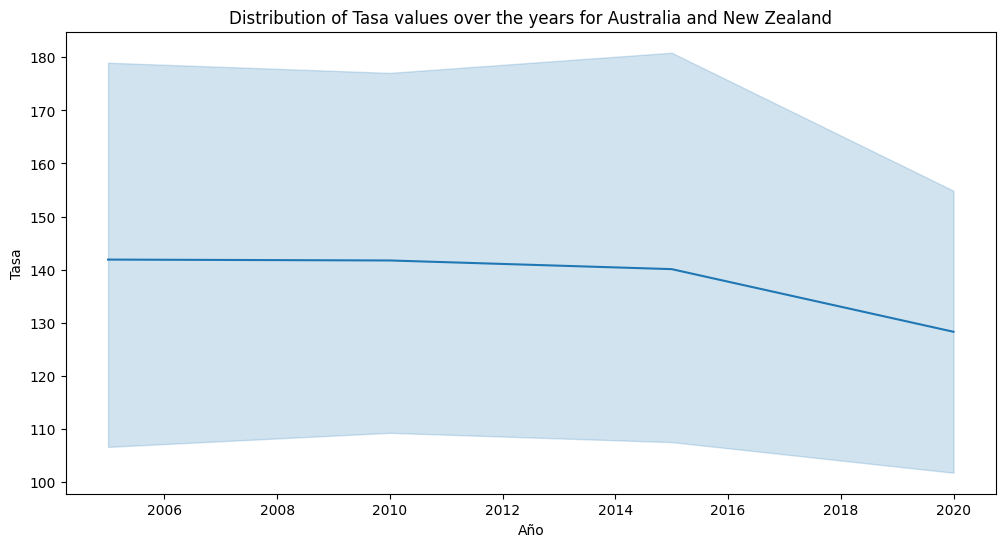

In [8]:
# Choose a specific country for visualization
selected_country = 'Australia and New Zealand'

# Filter data for the selected country
selected_country_data = datos_educativos_df[datos_educativos_df['Pais'] == selected_country]

# Plot the distribution of 'Tasa' values over the years for the selected country
plt.figure(figsize=(12, 6))
sns.lineplot(x='Año', y='Tasa', data=selected_country_data)
plt.title(f'Distribution of Tasa values over the years for {selected_country}')
plt.show()


**Can you create a bar chart to show the number of records for each type of educational data in the 'datos_educativos.csv' file?**

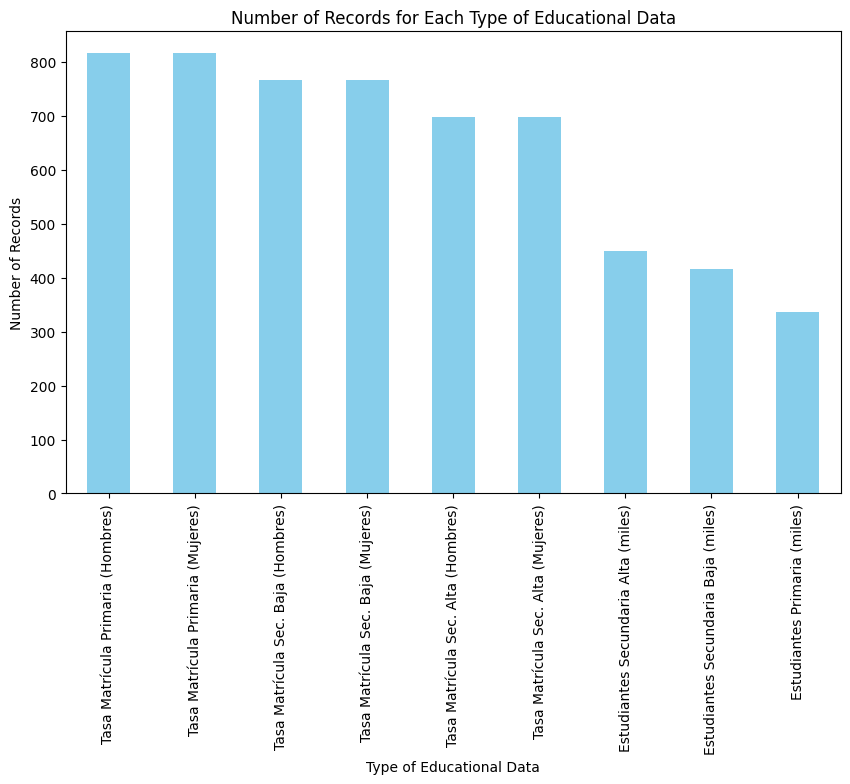

In [9]:
# Plot a bar chart for the number of records for each type of educational data
plt.figure(figsize=(10, 6))
educational_data_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Records for Each Type of Educational Data')
plt.xlabel('Type of Educational Data')
plt.ylabel('Number of Records')
plt.show()


**Visualize the distribution of educational data rates ('Tasa') using a histogram.**

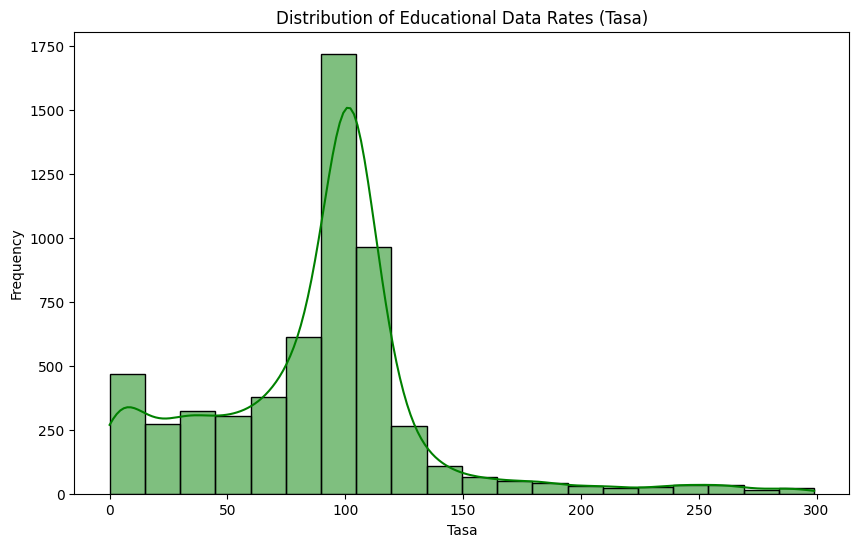

In [10]:
# Plot a histogram for the distribution of 'Tasa' values
plt.figure(figsize=(10, 6))
sns.histplot(datos_educativos_df['Tasa'].dropna(), bins=20, kde=True, color='green')
plt.title('Distribution of Educational Data Rates (Tasa)')
plt.xlabel('Tasa')
plt.ylabel('Frequency')
plt.show()


**Create a bar plot to show the distribution of educational data rates ('Tasa') for a specific year.**

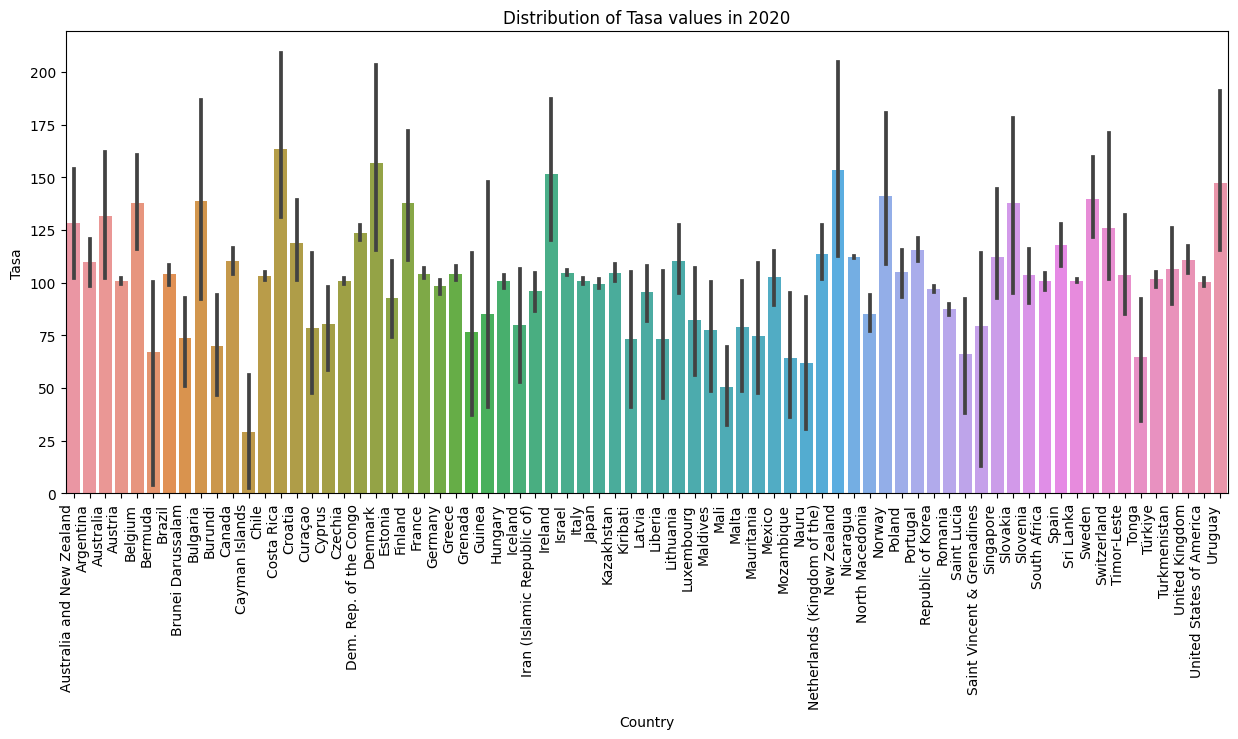

In [11]:
# Choose a specific year for visualization
selected_year = 2020

# Filter data for the selected year
selected_year_data = datos_educativos_df[datos_educativos_df['Año'] == selected_year]

# Plot a bar chart for the distribution of 'Tasa' values for the selected year
plt.figure(figsize=(15, 6))
sns.barplot(x='Pais', y='Tasa', data=selected_year_data)
plt.title(f'Distribution of Tasa values in {selected_year}')
plt.xlabel('Country')
plt.ylabel('Tasa')
plt.xticks(rotation=90, ha='right')
plt.show()


**Create a stacked bar plot to compare the contribution of different educational data types for a specific country.**

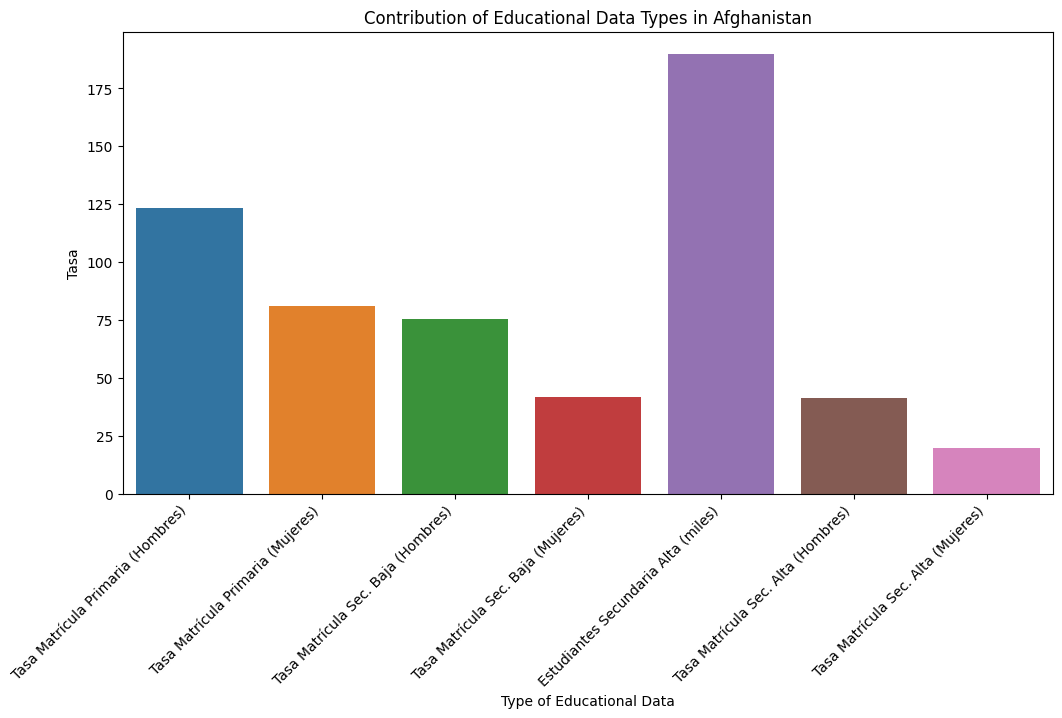

In [12]:
# Choose a specific country for visualization
selected_country = 'Afghanistan'

# Filter data for the selected country
selected_country_data = datos_educativos_df[datos_educativos_df['Pais'] == selected_country]

# Plot a stacked bar chart for the contribution of different educational data types
plt.figure(figsize=(12, 6))
sns.barplot(x='Tipo de Dato Educativo', y='Tasa', data=selected_country_data, errorbar=None)
plt.title(f'Contribution of Educational Data Types in {selected_country}')
plt.xlabel('Type of Educational Data')
plt.ylabel('Tasa')
plt.xticks(rotation=45, ha='right')
plt.show()


**Visualize the total number of records for each year using a bar plot.**

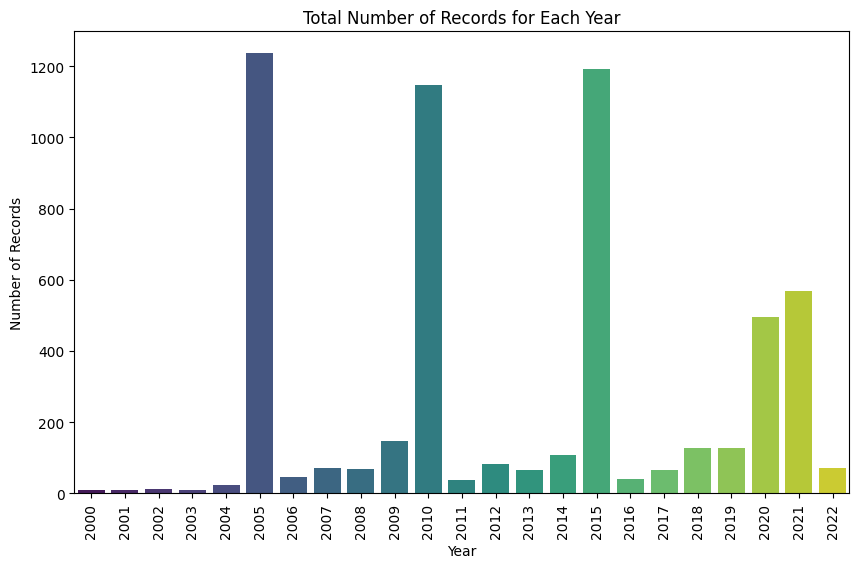

In [13]:
# Plot a bar chart for the total number of records for each year
plt.figure(figsize=(10, 6))
sns.countplot(x='Año', data=datos_educativos_df, palette='viridis')
plt.title('Total Number of Records for Each Year')
plt.xlabel('Year')
plt.xticks(rotation=90)
plt.ylabel('Number of Records')
plt.show()


**Create a scatter plot to explore the relationship between the 'Año' (Year) and 'Tasa' (Rate) columns.**

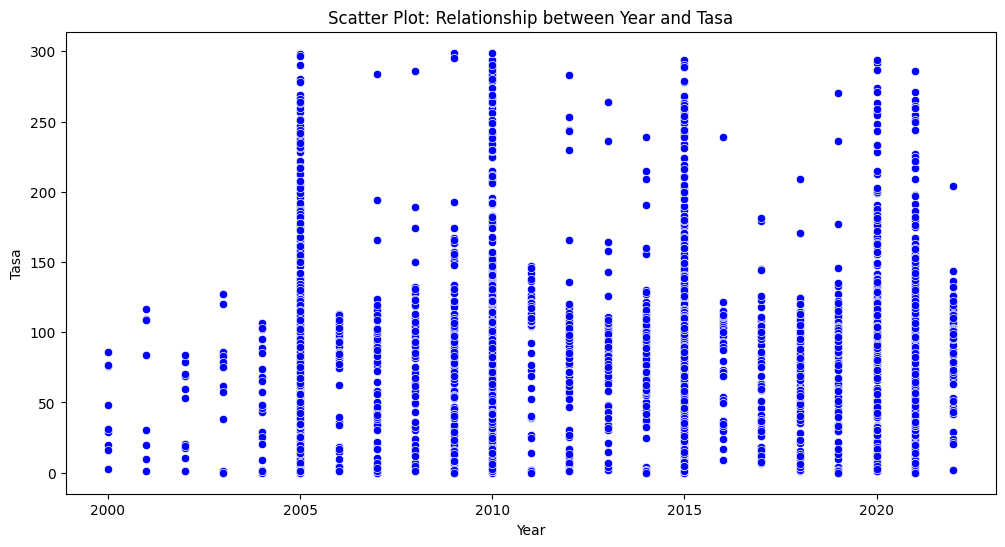

In [14]:
# Plot a scatter plot to explore the relationship between 'Año' and 'Tasa'
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Año', y='Tasa', data=datos_educativos_df, color='blue')
plt.title('Scatter Plot: Relationship between Year and Tasa')
plt.xlabel('Year')
plt.ylabel('Tasa')
plt.show()


**Generate a scatter plot to visualize the correlation between 'ID' and 'Tasa' columns.**

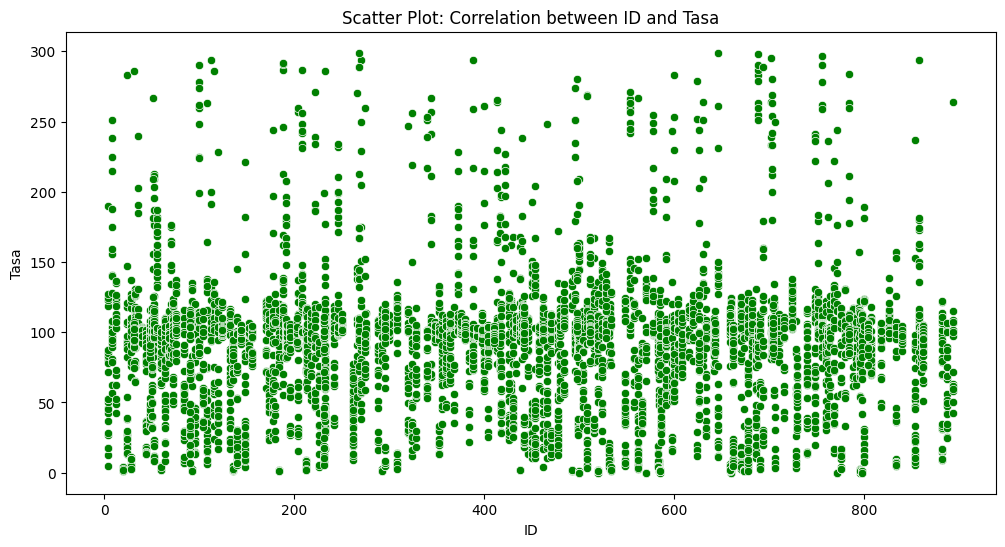

In [15]:
# Plot a scatter plot to visualize the correlation between 'ID' and 'Tasa'
plt.figure(figsize=(12, 6))
sns.scatterplot(x='ID', y='Tasa', data=datos_educativos_df, color='green')
plt.title('Scatter Plot: Correlation between ID and Tasa')
plt.xlabel('ID')
plt.ylabel('Tasa')
plt.show()


**Create a scatter plot to compare the 'Tasa' values for different countries in a specific year.**

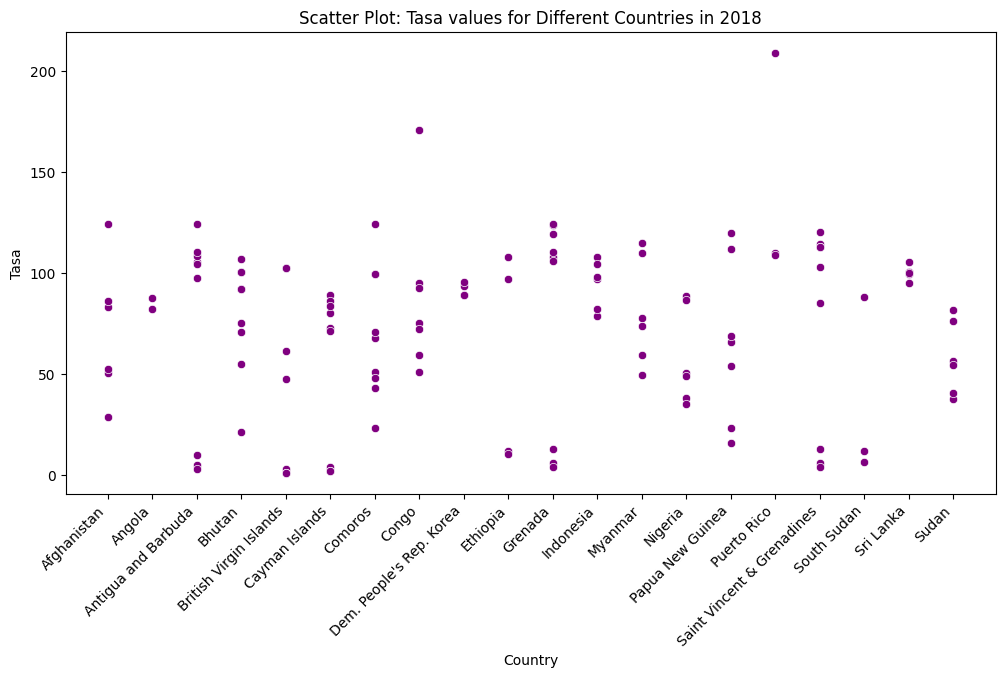

In [16]:
# Choose a specific year for visualization
selected_year = 2018

# Filter data for the selected year
selected_year_data = datos_educativos_df[datos_educativos_df['Año'] == selected_year]

# Plot a scatter plot to compare 'Tasa' values for different countries in the selected year
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Pais', y='Tasa', data=selected_year_data, color='purple')
plt.title(f'Scatter Plot: Tasa values for Different Countries in {selected_year}')
plt.xlabel('Country')
plt.ylabel('Tasa')
plt.xticks(rotation=45, ha='right')
plt.show()


**Create a scatter plot to explore the relationship between 'Año' and 'Tasa' for different types of educational data.**

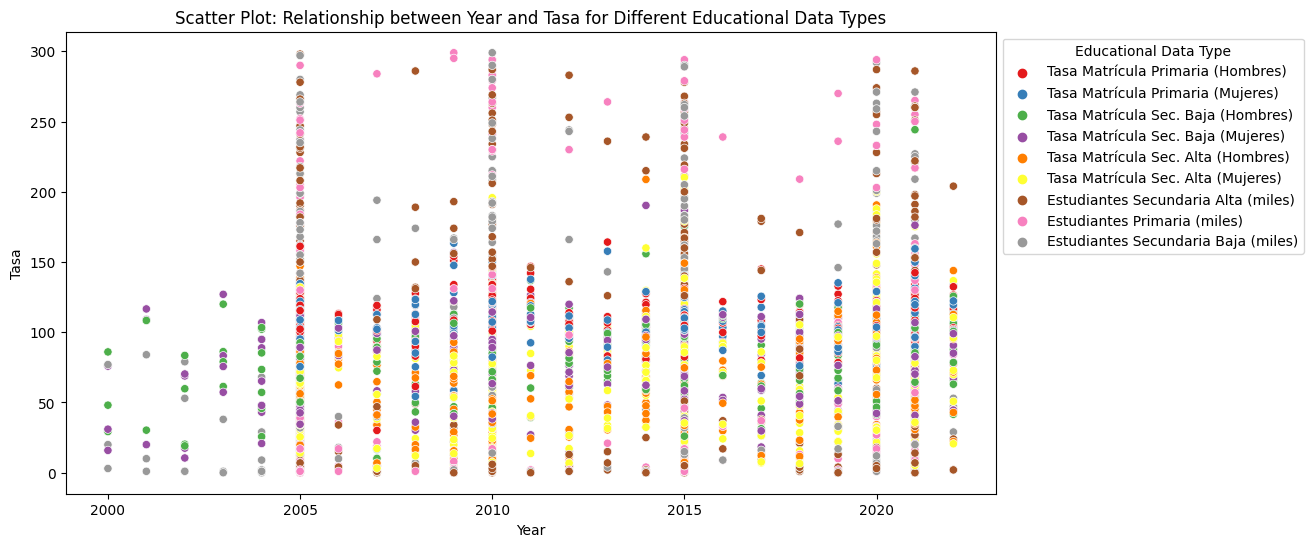

In [17]:
# Plot a scatter plot to explore the relationship between 'Año' and 'Tasa' for different types of educational data
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Año', y='Tasa', hue='Tipo de Dato Educativo', data=datos_educativos_df, palette='Set1')
plt.title('Scatter Plot: Relationship between Year and Tasa for Different Educational Data Types')
plt.xlabel('Year')
plt.ylabel('Tasa')
plt.legend(title='Educational Data Type', bbox_to_anchor=(1,1))
plt.show()


**Generate a scatter plot to visualize the distribution of 'Tasa' values across different sources of educational data.**

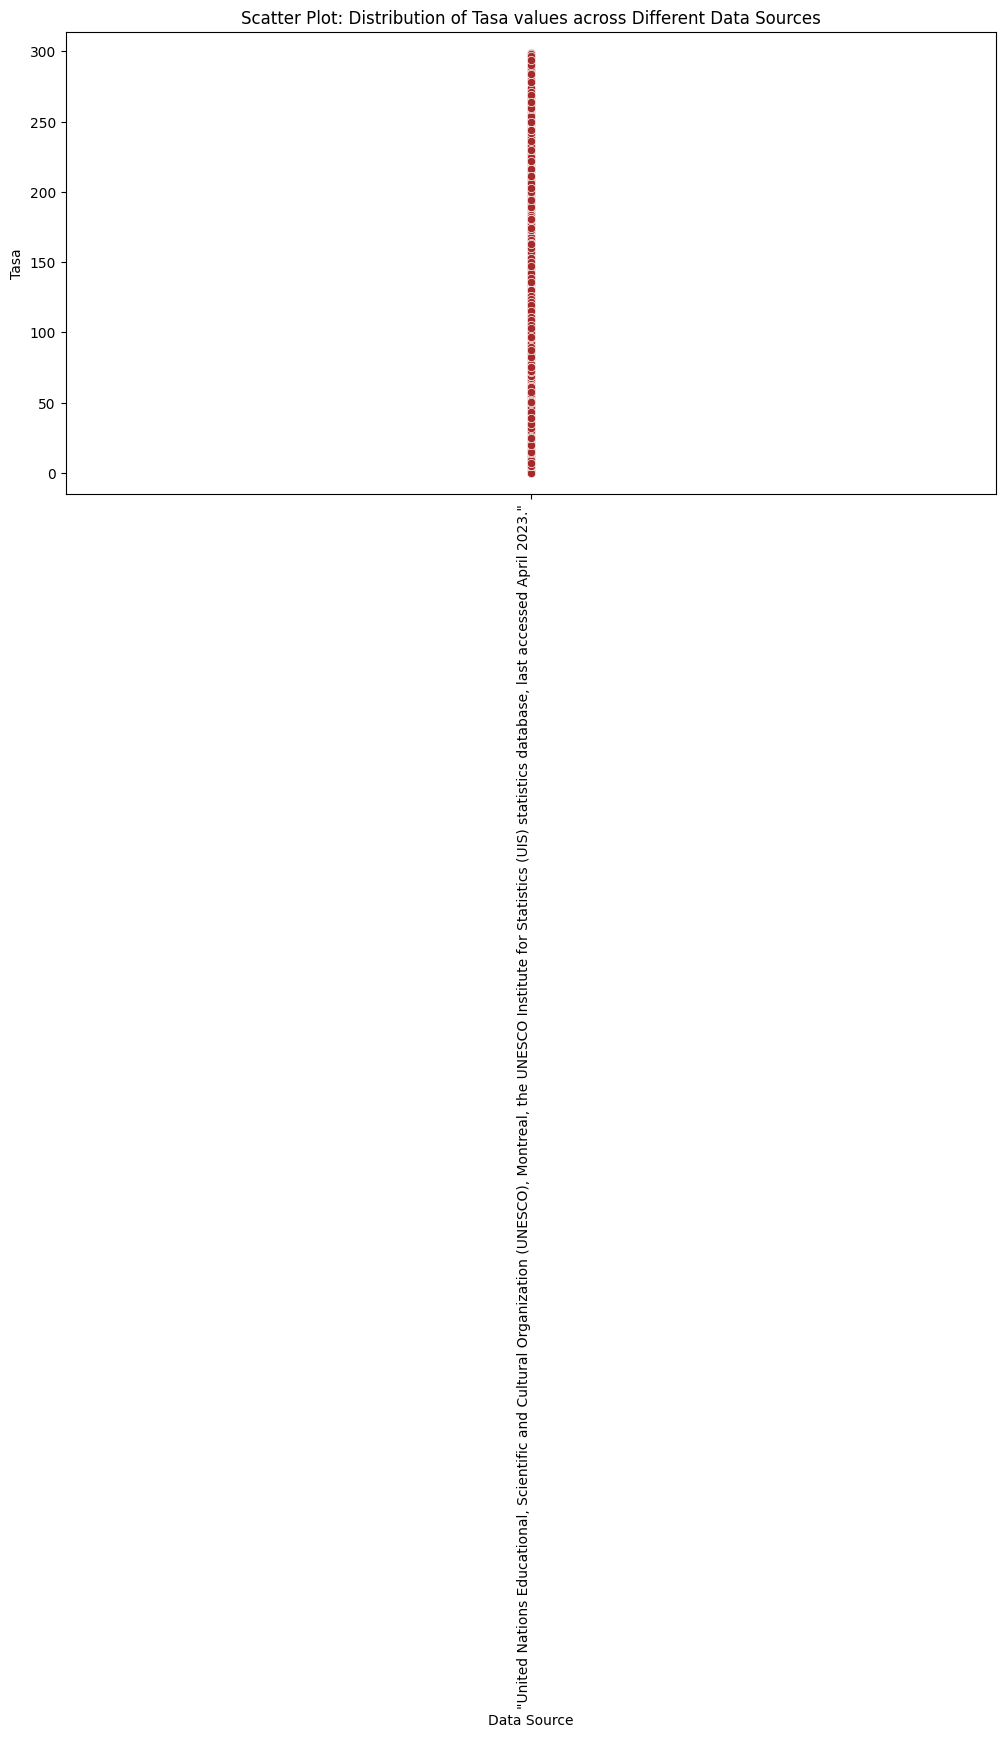

In [18]:
# Plot a scatter plot to visualize the distribution of 'Tasa' values across different sources of educational data
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Fuente Datos', y='Tasa', data=datos_educativos_df, color='brown')
plt.title('Scatter Plot: Distribution of Tasa values across Different Data Sources')
plt.xlabel('Data Source')
plt.ylabel('Tasa')
plt.xticks(rotation=90, ha='right')
plt.show()


**Create a scatter plot to compare the 'Tasa' values for different countries and types of educational data.**

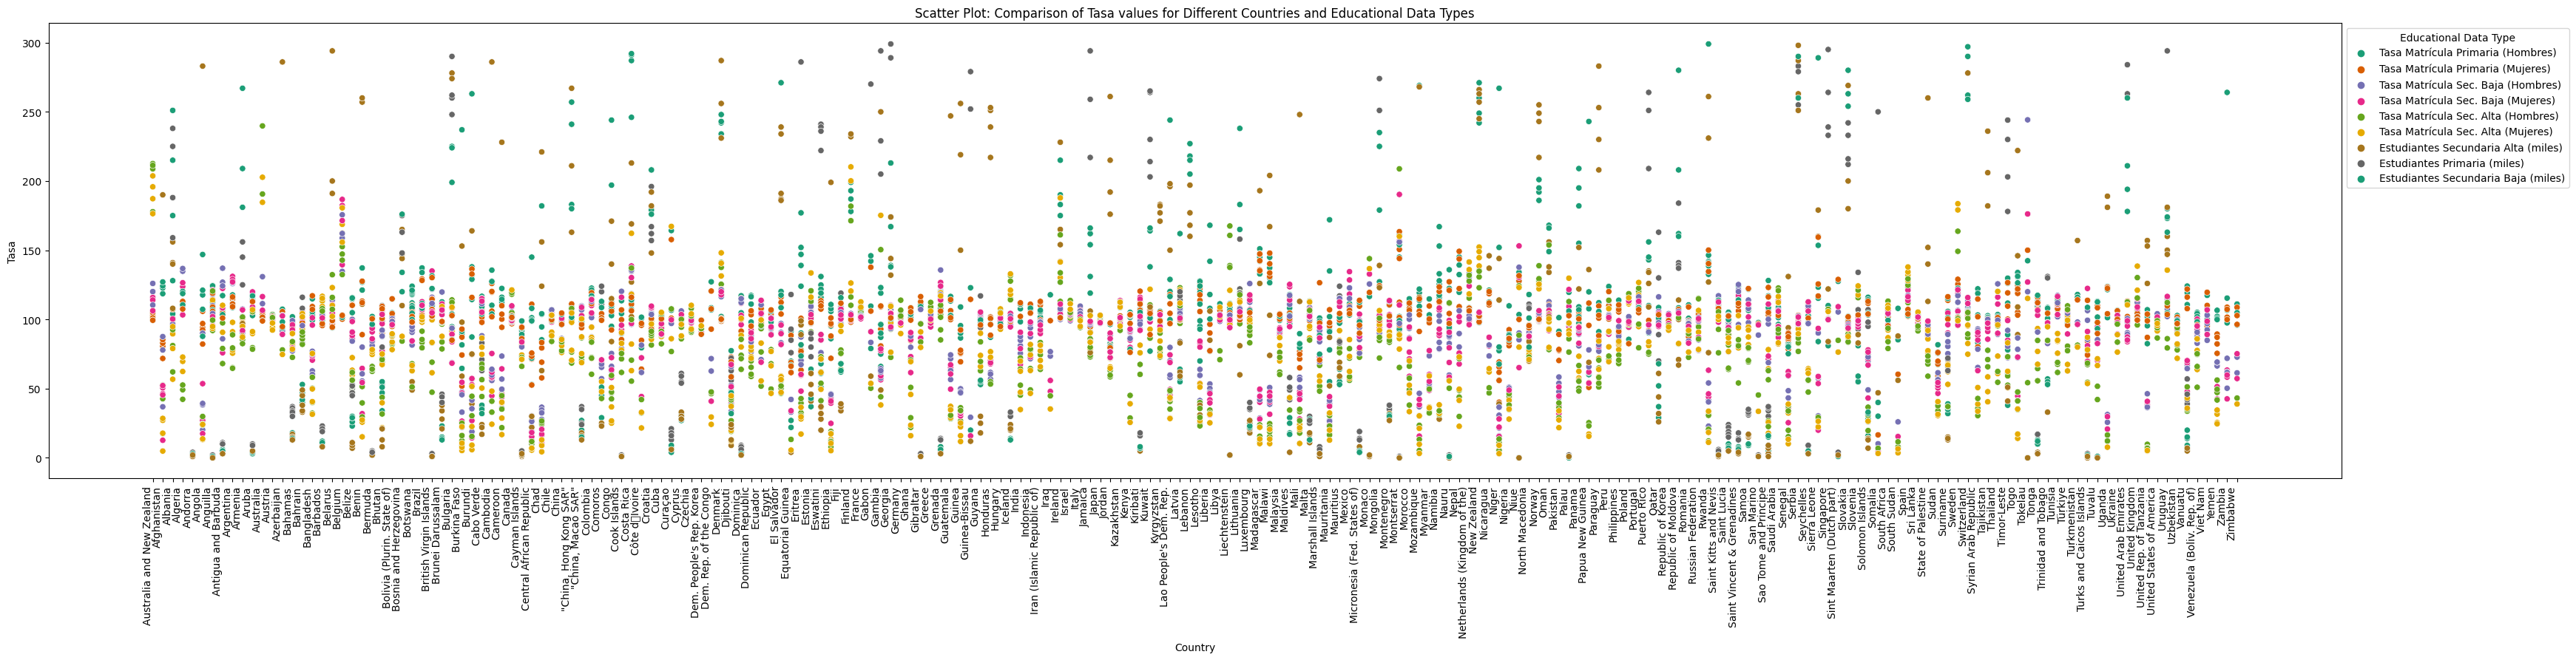

In [19]:
import warnings
warnings.filterwarnings('ignore')
# Plot a scatter plot to compare 'Tasa' values for different countries and types of educational data
plt.figure(figsize=(40, 8))
sns.scatterplot(x='Pais', y='Tasa', hue='Tipo de Dato Educativo', data=datos_educativos_df, palette='Dark2')
plt.title('Scatter Plot: Comparison of Tasa values for Different Countries and Educational Data Types')
plt.xlabel('Country')
plt.ylabel('Tasa')
plt.xticks(rotation=90, ha='right')
plt.legend(title='Educational Data Type', bbox_to_anchor=(1,1))
plt.show()


**Create a pair plot to visualize the relationships between numerical columns in the 'datos_educativos.csv' file.**

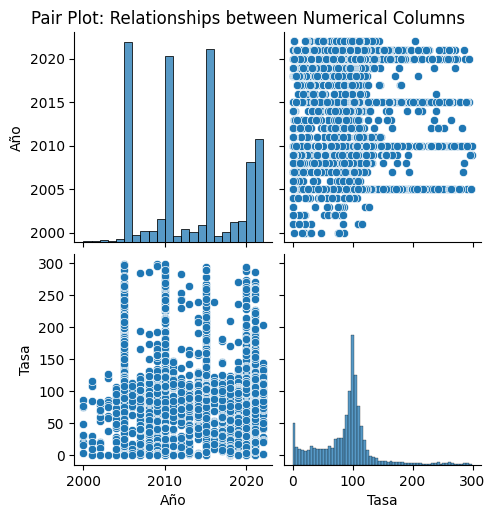

In [20]:
# Select numerical columns for pair plot
numerical_columns = ['Año', 'Tasa']

# Add more numerical columns based on your dataset if needed

# Create a pair plot for numerical columns
sns.pairplot(datos_educativos_df[numerical_columns])
plt.suptitle('Pair Plot: Relationships between Numerical Columns', y=1.02)
plt.show()


**Generate a pair plot to explore the relationships between 'Año', 'Tasa', and 'ID' columns.**

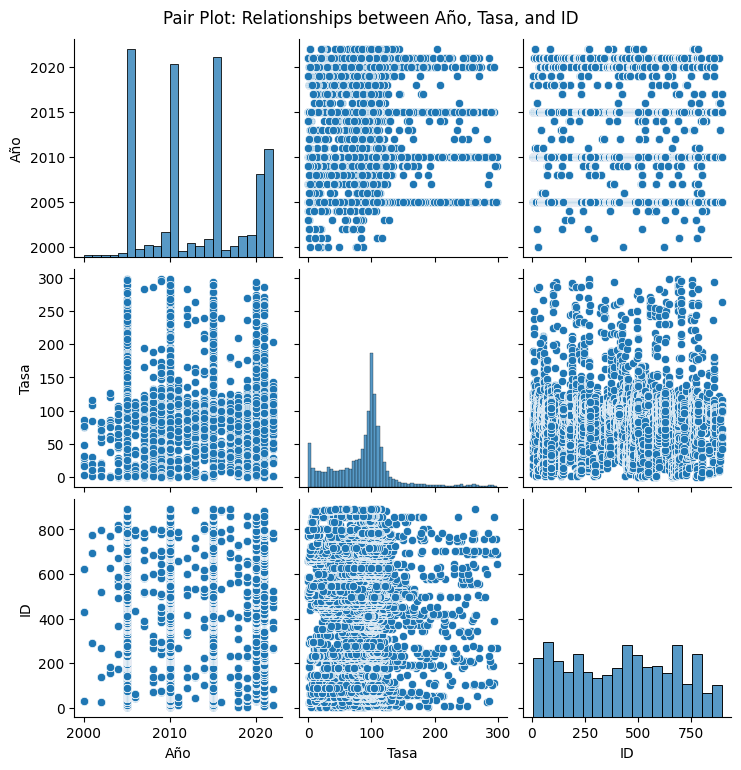

In [21]:
# Select columns for pair plot
selected_columns = ['Año', 'Tasa', 'ID']

# Create a pair plot for selected columns
sns.pairplot(datos_educativos_df[selected_columns])
plt.suptitle('Pair Plot: Relationships between Año, Tasa, and ID', y=1.02)
plt.show()


**Create a pair plot to visualize the relationships between 'Tasa' values for different types of educational data.**

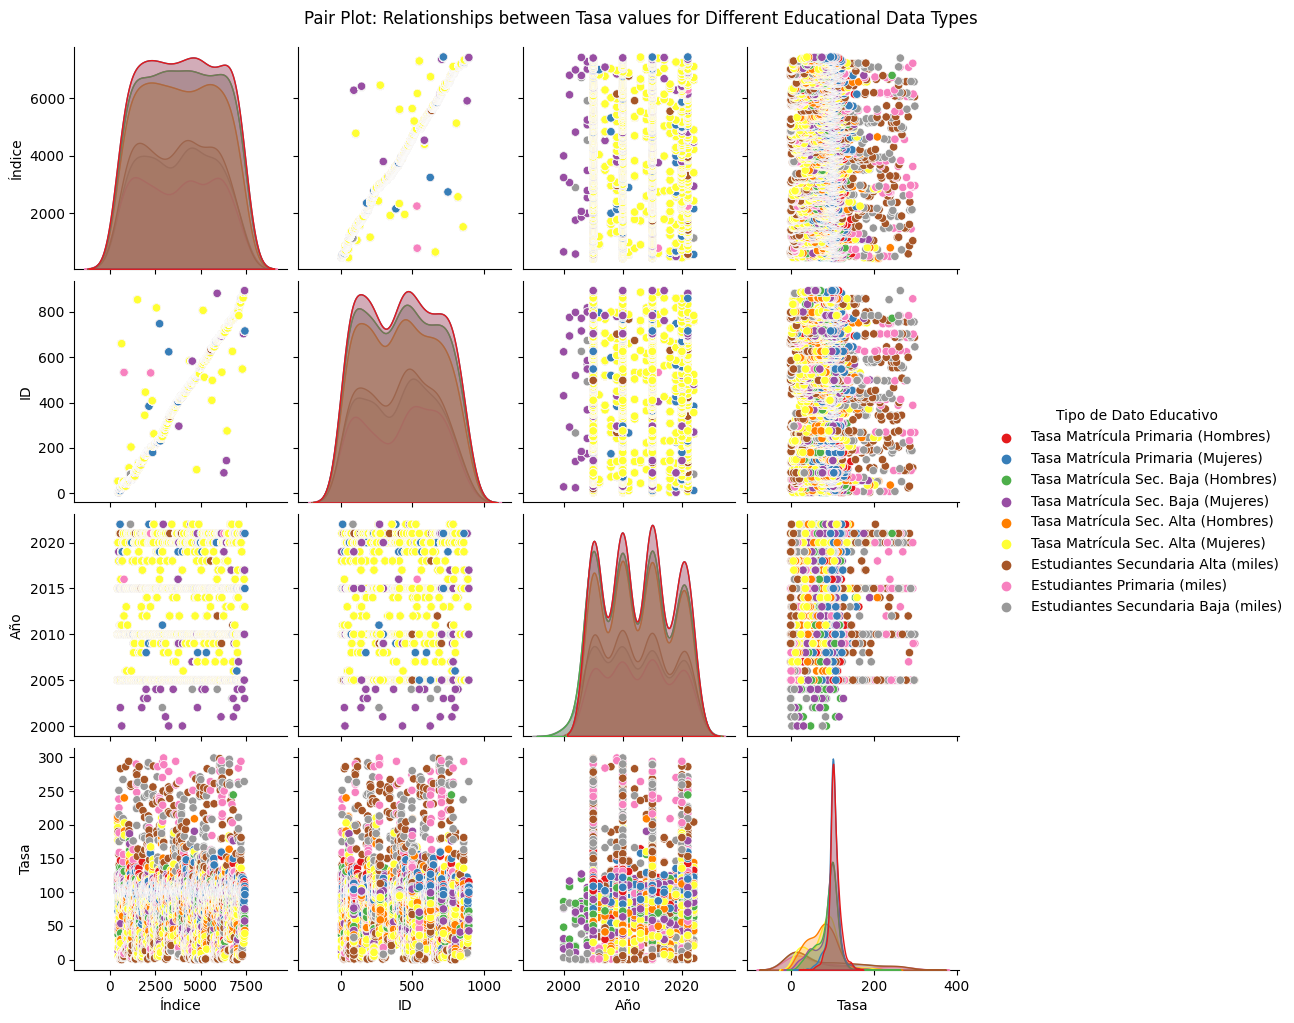

In [22]:
# Create a pair plot to visualize relationships between 'Tasa' values for different types of educational data
sns.pairplot(datos_educativos_df, hue='Tipo de Dato Educativo', palette='Set1')
plt.suptitle('Pair Plot: Relationships between Tasa values for Different Educational Data Types', y=1.02)
plt.show()
